In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
US_data = pd.read_csv('US_data.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X= US_data.drop(columns=['price_per_piece','prod_id', 'max_age', 'piece_count', 'list_price'], axis=1)

y = US_data['price_per_piece']

In [5]:
X

,min_age,avg_age,theme_name_Angry Birds™,theme_name_Architecture,theme_name_BOOST,theme_name_BrickHeadz,theme_name_City,theme_name_Classic,theme_name_Creator 3-in-1,theme_name_Creator Expert,...,theme_name_NEXO KNIGHTS™,theme_name_NINJAGO®,theme_name_Power Functions,theme_name_Pteranodon Chase,theme_name_Speed Champions,theme_name_Star Wars™,theme_name_Stygimoloch Breakout,theme_name_THE LEGO® BATMAN MOVIE,theme_name_THE LEGO® NINJAGO® MOVIE™,theme_name_Technic
0,6.0,9.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.0,9.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,9.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.0,55.5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12.0,55.5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,6.0,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
667,6.0,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
668,10.0,54.5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669,10.0,54.5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y

0      0.108267
1      0.118988
2      0.175541
3      0.096890
4      0.107513
         ...   
666    0.208125
667    0.091651
668    0.097941
669    0.112247
670    0.498750
Name: price_per_piece, Length: 671, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [8]:
print(len(X_train))
print(len(X_test))

536
135


# Modelling

In [9]:
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score

# Random Forest Regressor

In [10]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score


In [11]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf= rf.predict((X_test))

In [12]:
r2 = r2_score(y_test, y_pred_rf)
print(r2)

0.12894276778528957


r2 was negative prior to removing avg_age, min_age, max_age columns.
"In practice, R2 will be negative whenever your model’s predictions are worse than a constant function that always predicts the mean of the data."

In [13]:
rf.feature_importances_

array([4.36285893e-02, 2.64199638e-01, 1.93200090e-06, 9.21315323e-06,
       1.78026347e-04, 2.87276604e-05, 7.29910067e-02, 1.87744806e-05,
       2.00045802e-04, 5.33700495e-05, 4.42190470e-03, 4.63716975e-05,
       1.16983627e-02, 2.60569650e-01, 2.18077940e-05, 9.05587044e-03,
       4.04798352e-05, 7.54748652e-03, 4.17407819e-06, 6.45473162e-05,
       1.28452412e-05, 3.17539054e-02, 8.03159594e-07, 8.13998366e-03,
       8.86607796e-03, 3.55454743e-04, 2.11873060e-02, 9.19589182e-04,
       6.63661486e-05, 2.49275359e-01, 6.86080877e-05, 1.44095409e-04,
       3.45384053e-03, 0.00000000e+00, 2.64768902e-04, 3.37689837e-04,
       3.73327594e-04])

Text(0.5, 1.0, 'Features Importance: Random Forest Regressor')

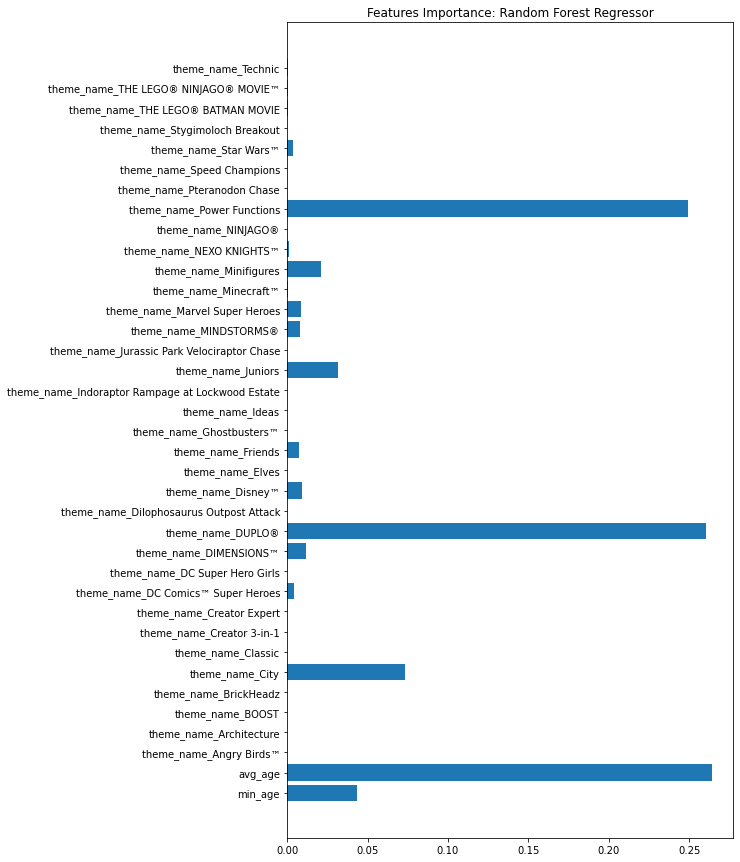

In [14]:
plt.figure(figsize=(8,15))

plt.barh(X_train.columns, rf.feature_importances_)
plt.title('Features Importance: Random Forest Regressor')

Text(0, 0.5, 'Predicted Values')

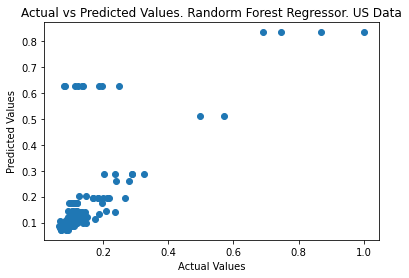

In [20]:
plt.scatter(y_test, y_pred_rf)
plt.title('Actual vs Predicted Values. Randorm Forest Regressor. US Data')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


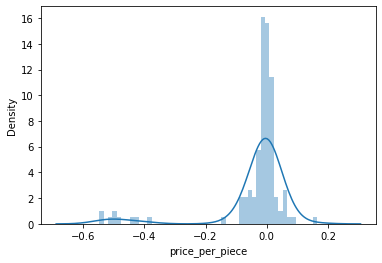

In [16]:
sns.distplot((y_test-y_pred_rf), bins=50);

Data is underfitting

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures